In [1]:
import os
import ROOT
from itertools import product

Welcome to JupyROOT 6.28/04


In [23]:
ERA = "2017"
MEASURE = "muon"
isQCD = False

In [24]:
ptCorr_bins = []
abseta_bins = []
if MEASURE == "muon":
    ptCorr_bins = [10., 15., 20., 30., 50., 100.]
    abseta_bins = [0., 0.9, 1.6, 2.4]
elif MEASURE == "electron":
    ptCorr_bins = [10., 15., 20., 25., 35., 50., 100.]
    abseta_bins = [0., 0.8, 1.579, 2.5]
else:
    raise NameError(f"Wrong measure {MEASURE}")

In [25]:
if not isQCD:
    file_path = f"results/{ERA}/ROOT/{MEASURE}/fakerate.root" 
else:
    file_path = f"results/{ERA}/ROOT/{MEASURE}/fakerate_qcd.root"
assert os.path.exists(file_path)
f = ROOT.TFile.Open(file_path)
h = f.Get("fakerate")

for abseta, ptCorr in product(abseta_bins[:-1], ptCorr_bins[:-1]):
    thisbin = h.FindBin(abseta+1e-5, ptCorr+1e-5)
    value, error = h.GetBinContent(thisbin), h.GetBinError(thisbin)
    print(abseta, ptCorr, value, error, error/value*100)

0.0 10.0 0.3570149050365009 0.03416051308462289 9.568371684966582
0.0 15.0 0.1906919074813202 0.023644160088940946 12.399141841536764
0.0 20.0 0.1201092239940484 0.012368296398994703 10.29754084466283
0.0 30.0 0.0801718505019557 0.01237158312067239 15.431330377450376
0.0 50.0 0.1021757565645635 0.028264694780816432 27.662819176637417
0.9 10.0 0.405899799245278 0.03905196237342737 9.621084426757493
0.9 15.0 0.1996020558522593 0.019987216919759375 10.013532593348357
0.9 20.0 0.1550650529170388 0.025483613615259876 16.43414369380433
0.9 30.0 0.1053731875014124 0.01802340390587674 17.10435484893646
0.9 50.0 0.1154279780561766 0.04150268948234773 35.95548512696736
1.6 10.0 0.4430066544174161 0.04200252246243911 9.481239625548127
1.6 15.0 0.2340025305246858 0.07647351571674751 32.680636207342225
1.6 20.0 0.1917448276292422 0.03410856352894577 17.788518183602893
1.6 30.0 0.1325286634689427 0.017239336675490876 13.0080061356167
1.6 50.0 0.18110269641388 0.04663536629643282 25.750785173212147


In [26]:
def setInfoTo(text: ROOT.TLatex):
    text.SetTextSize(0.035)
    text.SetTextFont(42)

def setLogoTo(text: ROOT.TLatex):
    text.SetTextSize(0.04)
    text.SetTextFont(61)
    
def setWorkInProgressTo(text: ROOT.TLatex):
    text.SetTextSize(0.035)
    text.SetTextFont(52)
    
def setExtraInfoTo(text: ROOT.TLatex):
    text.SetTextSize(0.035)
    text.SetTextFont(42)

In [27]:
# prepare canvas and legend
canvas = ROOT.TCanvas("c", "", 1600, 1200)
canvas.SetLeftMargin(0.1)
canvas.SetRightMargin(0.08)
canvas.SetTopMargin(0.1)
canvas.SetBottomMargin(0.12)

legend = ROOT.TLegend(0.67, 0.65, 0.9, 0.85)
legend.SetFillStyle(0)
legend.SetBorderSize(0)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [28]:
# prepare histograms
projections = {}
projections["eta1"] = h.ProjectionY(f"eta{str(abseta_bins[0])}to{str(abseta_bins[1])}", 1, 1)
projections["eta2"] = h.ProjectionY(f"eta{str(abseta_bins[1])}to{str(abseta_bins[2])}", 2, 2)
projections["eta3"] = h.ProjectionY(f"eta{str(abseta_bins[2])}to{str(abseta_bins[3])}", 3, 3)

projections["eta1"].SetLineColor(ROOT.kRed)
projections["eta2"].SetLineColor(ROOT.kGreen)
projections["eta3"].SetLineColor(ROOT.kBlue)

title = ""
if MEASURE == "muon":     title = "fake rate (#mu)"
if MEASURE == "electron": title = "fake rate (e)"
for hist in projections.values():
    hist.SetTitle("")
    hist.SetStats(0)
    hist.SetLineWidth(2)
    #hist.GetXaxis().SetLabelSize(0)
    hist.GetXaxis().SetTitle("p_{T}^{corr}")
    hist.GetXaxis().SetRangeUser(10., 50.)
    hist.GetYaxis().SetRangeUser(0., 1.) 
    hist.GetYaxis().SetTitle(title)


legend.AddEntry(projections["eta1"], f"{abseta_bins[0]} < |#eta| < {abseta_bins[1]}", "lep")
legend.AddEntry(projections["eta2"], f"{abseta_bins[1]} < |#eta| < {abseta_bins[2]}", "lep")
legend.AddEntry(projections["eta3"], f"{abseta_bins[2]} < |#eta| < {abseta_bins[3]}", "lep")

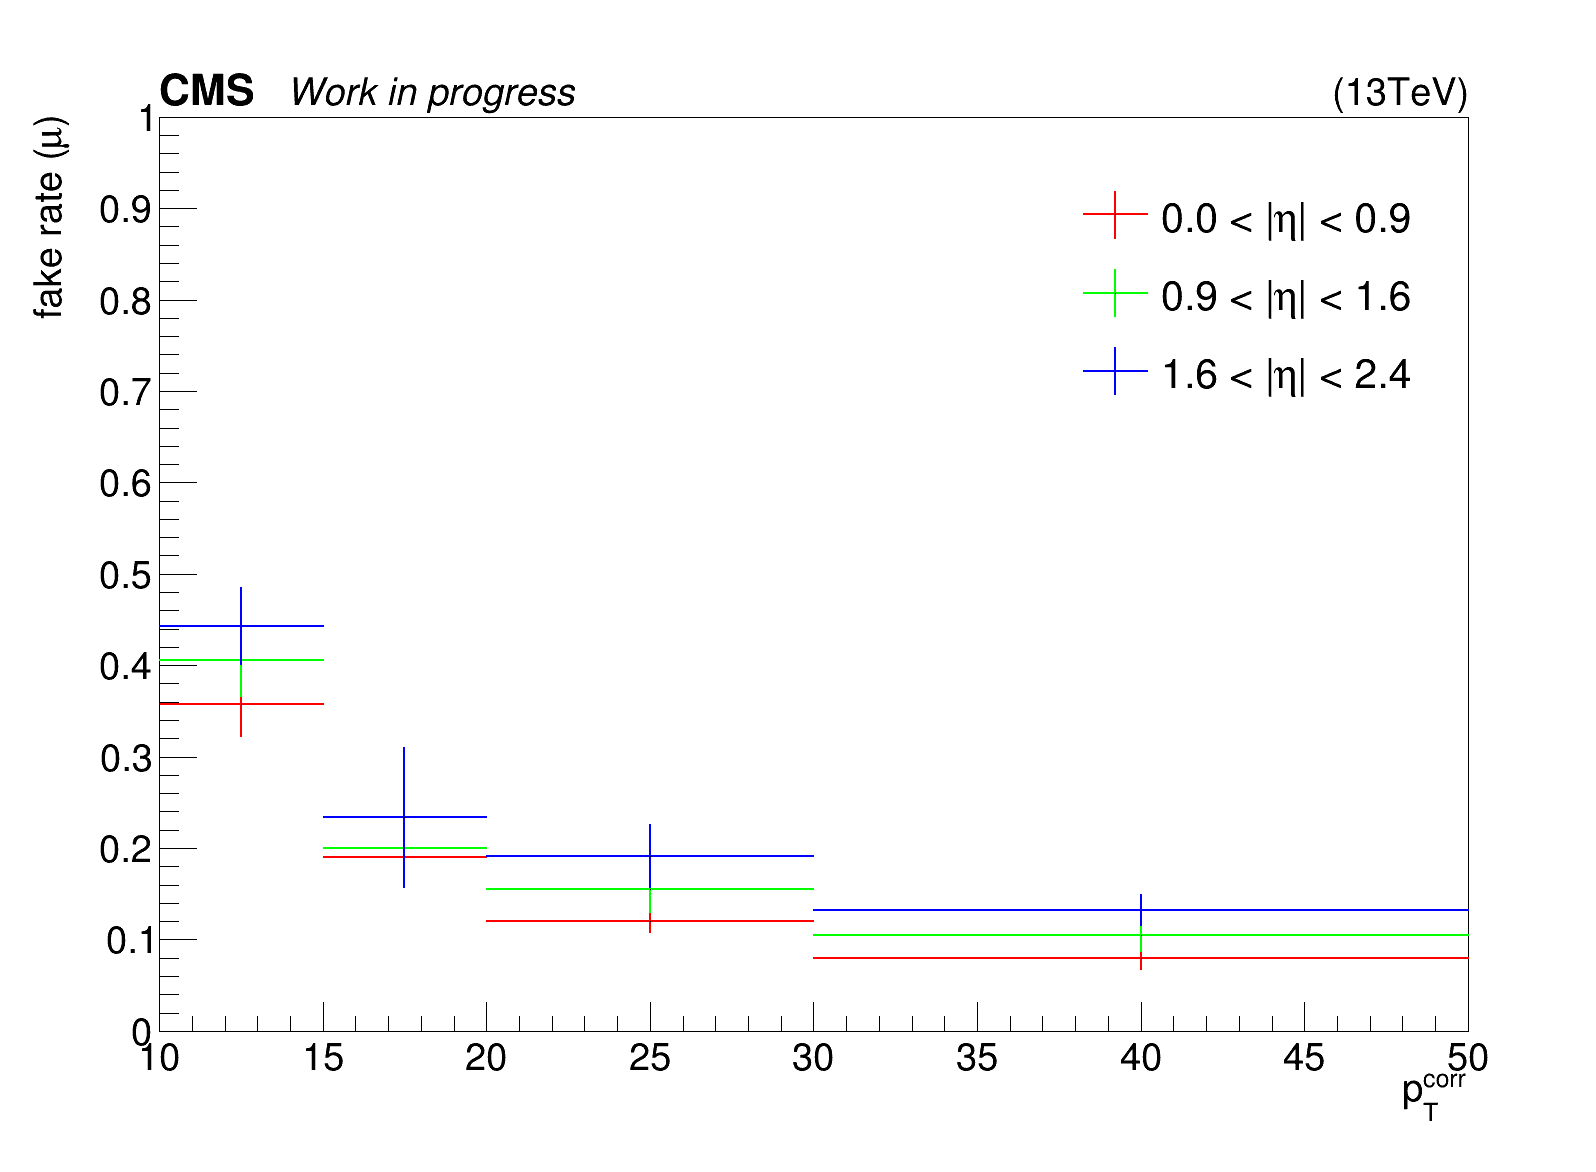

In [30]:
canvas.cd()
projections["eta1"].Draw()
projections["eta2"].Draw("same")
projections["eta3"].Draw("same")
legend.Draw("same")

text = ROOT.TLatex()
setInfoTo(text); text.DrawLatexNDC(0.835, 0.91, "(13TeV)")
setLogoTo(text); text.DrawLatexNDC(0.1, 0.91, "CMS")
setWorkInProgressTo(text); text.DrawLatexNDC(0.18, 0.91, "Work in progress")
if isQCD:
    setExtraInfoTo(text); text.DrawLatexNDC(0.15, 0.73, "measured in QCD MC")


canvas.Draw()